In [1]:
import xarray as xr
trial_nc = r'C:\Users\atzeh\PycharmProjects\OAC_Thesis\example\results\trial.nc'
nc = xr.load_dataset(trial_nc)
display(nc)

# this is a changed file

<xarray.Dataset> Size: 14kB
Dimensions:        (ac: 2, time: 41)
Coordinates:
  * time           (time) int64 328B 2020 2021 2022 2023 ... 2057 2058 2059 2060
  * ac             (ac) <U7 56B 'DEFAULT' 'TOTAL'
Data variables: (12/21)
    emis_CO2       (ac, time) float64 656B 816.4 846.2 876.1 ... 0.0 0.0 0.0
    emis_distance  (ac, time) float64 656B 5.327e+10 5.431e+10 ... 0.0 0.0
    emis_H2O       (ac, time) float64 656B 327.6 339.6 351.6 ... 0.0 0.0 0.0
    emis_NOx       (ac, time) float64 656B 4.112 4.356 4.6 4.844 ... 0.0 0.0 0.0
    conc_CH4       (ac, time) float64 656B 0.0 -4.983 -9.974 ... -111.4 -103.9
    conc_CO2       (ac, time) float64 656B 0.1048 0.2077 0.3104 ... 3.334 3.298
    ...             ...
    dT_CO2         (ac, time) float64 656B 0.0001018 0.000291 ... 0.02297
    dT_cont        (ac, time) float64 656B 0.002273 0.004255 ... 0.007085
    dT_H2O         (ac, time) float64 656B 0.0002308 0.0004301 ... 0.0007509
    dT_O3          (ac, time) float64 656B 0.003162 0.006121 ... 0.02057 0.01849
    dT_PMO         (ac, time) float64 656B 0.0 -6.501e-05 ... -0.01489 -0.01464
    dT_SWV         (ac, time) float64 656B -5.688e-05 -0.0001075 ... -0.008723
Attributes:
    title:        trial
    created:      2025-10-22 10:41:15
    user:         atzeh
    oac version:  0.11.1

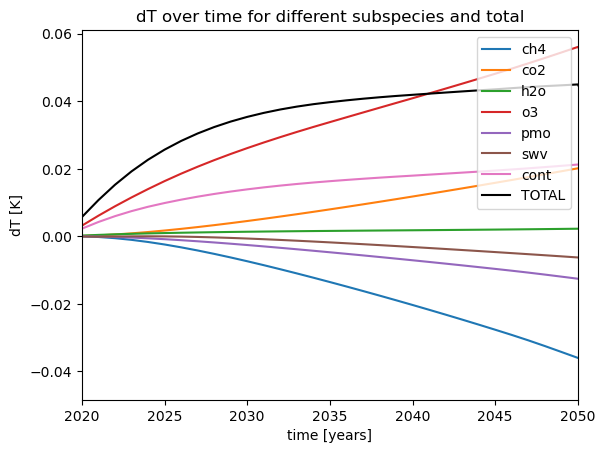

<xarray.DataArray (time: 41)> Size: 328B
array([ 0.00571085,  0.01073873,  0.01526995,  0.01923765,  0.02269196,
        0.02567523,  0.02824985,  0.03046563,  0.03236685,  0.03399276,
        0.03537797,  0.03656172,  0.03756905,  0.03842187,  0.0391391 ,
        0.03973649,  0.04027305,  0.04075498,  0.04118705,  0.0415728 ,
        0.04191487,  0.04225508,  0.04259069,  0.04291876,  0.04323667,
        0.04354214,  0.04388644,  0.04421134,  0.04448497,  0.04472538,
        0.04498647,  0.03444552,  0.02487963,  0.01630775,  0.00875192,
        0.00222681, -0.00326992, -0.00776616, -0.01132318, -0.0140424 ,
       -0.01607174])
Coordinates:
  * time     (time) int64 328B 2020 2021 2022 2023 2024 ... 2057 2058 2059 2060
    ac       <U7 28B 'TOTAL'

In [2]:
dT = nc['dT_CH4'][1] + nc['dT_CO2'][1] + nc['dT_cont'][1] + nc['dT_H2O'][1] + nc['dT_O3'][1] + nc['dT_PMO'][1] + nc['dT_SWV'][1]
max(dT)
nc['dT_CH4'][1].plot(label='ch4')
nc['dT_CO2'][1].plot(label='co2')
nc['dT_H2O'][1].plot(label='h2o')
nc['dT_O3'][1].plot(label='o3')
nc['dT_PMO'][1].plot(label='pmo')
nc['dT_SWV'][1].plot(label='swv')
nc['dT_cont'][1].plot(label='cont')
dT.plot(label='TOTAL', color='black')

import matplotlib.pyplot as plt
plt.legend(loc='upper right')
plt.ylabel('dT [K]')
plt.xlim(2020,2050)
plt.title('dT over time for different subspecies and total')
plt.show()
dT

In [3]:
import numpy as np

numbers = np.array([10, 15, 23, 30])
differences = np.diff(dT)
print(differences)

[ 0.00502788  0.00453123  0.00396769  0.00345431  0.00298328  0.00257462
  0.00221578  0.00190122  0.00162591  0.00138522  0.00118375  0.00100733
  0.00085282  0.00071723  0.00059739  0.00053656  0.00048194  0.00043207
  0.00038575  0.00034207  0.00034021  0.00033561  0.00032808  0.0003179
  0.00030548  0.0003443   0.0003249   0.00027363  0.0002404   0.0002611
 -0.01054095 -0.00956589 -0.00857188 -0.00755583 -0.00652511 -0.00549672
 -0.00449625 -0.00355702 -0.00271922 -0.00202933]


[   0.           -4.98294359   -9.97357754  -14.97360262  -19.98201873
  -24.99432713  -29.98051113  -34.89272944  -39.73231365  -44.50463543
  -49.21785322  -53.88291217  -58.51333192  -63.1061157   -67.66772276
  -72.21614863  -76.76712664  -81.33412788  -85.92836123  -90.55877336
  -95.23204873  -99.95260957 -104.7226159  -109.54196553 -114.40829404
 -119.3169748  -124.30565174 -130.34646032 -137.02264921 -143.38491612
 -148.66650421 -152.28320211 -153.83334395 -153.09780929 -150.04002318
 -144.80595615 -137.72412419 -129.30558874 -120.24395676 -111.41538062
 -103.87855821]
[   0.           -4.98294359   -9.97357754  -14.97360262  -19.98201873
  -24.99432713  -29.98051113  -34.89272944  -39.73231365  -44.50463543
  -49.21785322  -53.88291217  -58.51333192  -63.1061157   -67.66772276
  -72.21614863  -76.76712664  -81.33412788  -85.92836123  -90.55877336
  -95.23204873  -99.95260957 -104.7226159  -109.54196553 -114.40829404
 -119.3169748  -124.30565174 -130.34646032 -137.02264921 -143

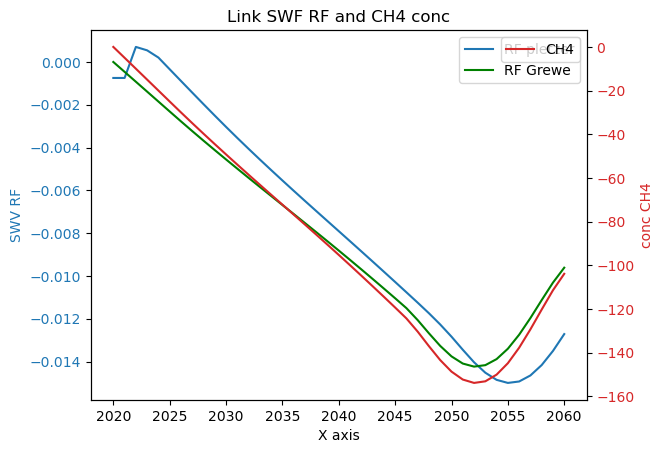

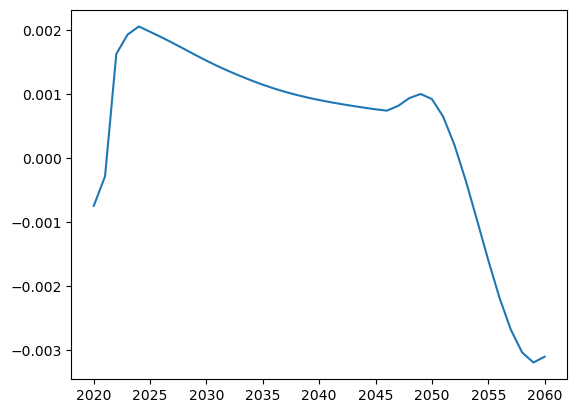

array([-0.00074676, -0.0002856 ,  0.00162688,  0.00192934,  0.00205593,
        0.00197253,  0.00188821,  0.00179888,  0.00170596,  0.00161225,
        0.00152128,  0.00143572,  0.00135621,  0.00128153,  0.00121121,
        0.00114597,  0.00108647,  0.00103331,  0.00098615,  0.0009442 ,
        0.00090668,  0.00087287,  0.00084209,  0.00081371,  0.0007871 ,
        0.00076168,  0.00074101,  0.00081501,  0.00093711,  0.00100138,
        0.00092122,  0.00064546,  0.00020312, -0.00035238, -0.00096957,
       -0.00159775, -0.00218609, -0.00268304, -0.00303634, -0.00319354,
       -0.003103  ])

In [4]:
# Example data
import numpy as np
import matplotlib.pyplot as plt
x = nc.coords['time'].values
# np.linspace(0, 10, 100)
y1 = nc['RF_SWV'][0].values          # first dataset (larger scale)
y2 = nc['conc_CH4'][0].values          # second dataset (smaller scale)
# GREWE way of RF calc
y3 = nc['conc_CH4'][0].values * 0.21129757195261092 * 4.38*10**-4 
print(nc['conc_CH4'][0].values)
print(nc['conc_CH4'][1].values)
# Create the figure and first axis
fig, ax1 = plt.subplots()

# Plot the first dataset on ax1
color = 'tab:blue'
ax1.set_xlabel('X axis')
ax1.set_ylabel('SWV RF', color=color)
ax1.plot(x, y1, color=color, label='RF pletzer')
ax1.plot(x, y3, color="green", label='RF Grewe')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('conc CH4', color=color)
ax2.plot(x, y2, color=color, label='CH4')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()

# Show plot
plt.title("Link SWF RF and CH4 conc")

plt.show()

plt.plot(x, y1-y3)
plt.show()
y1-y3

In [5]:
import numpy as np
c = {'SWV': np.array([-7.46760000e-04, -5.31696369e-05, -8.49272119e-04, -1.64179272e-03,
       -2.43054588e-03, -3.21480455e-03, -3.98990562e-03, -4.74856399e-03,
       -5.49120527e-03, -6.21886042e-03, -6.93295742e-03, -7.63530872e-03,
       -8.32806760e-03, -9.01088900e-03, -9.68482889e-03, -1.03526075e-02,
       -1.10165494e-02, -1.16785940e-02, -1.23403057e-02, -1.30028843e-02,
       -1.36671747e-02, -1.43336771e-02, -1.50025573e-02, -1.56736576e-02,
       -1.63465075e-02, -1.70203351e-02, -1.76942219e-02, -1.83709515e-02,
       -1.90509480e-02, -1.97328173e-02, -2.04152655e-02])}

b =  {'SWV': np.array([-7.46760000e-04, -1.57444583e-05, -7.74827915e-04, -1.53072541e-03,
       -2.28326120e-03, -3.03174247e-03, -3.77171727e-03, -4.49622363e-03,
       -5.20565775e-03, -5.90099480e-03, -6.58359062e-03, -7.25517039e-03,
       -7.91778739e-03, -8.57110668e-03, -9.21613392e-03, -9.85546966e-03,
       -1.04913387e-02, -1.11255996e-02, -1.17597544e-02, -1.23949571e-02,
       -1.30320234e-02, -1.36714396e-02, -1.43133719e-02, -1.49576761e-02,
       -1.56039080e-02, -1.62513331e-02, -1.68990751e-02, -1.75498172e-02,
       -1.82039769e-02, -1.88602227e-02, -1.95173176e-02])}

print(b['SWV']-c["SWV"])
print(1/(b['SWV']/(b['SWV']-c["SWV"])))
print('This means that most of the differences is below 7.5% exept for the first 2 values where the value is so small that the sign matters a lot')
print('max absolute error =', max(b['SWV']-c["SWV"]), "W/m^2")

[0.00000000e+00 3.74251786e-05 7.44442040e-05 1.11067310e-04
 1.47284680e-04 1.83062080e-04 2.18188350e-04 2.52340360e-04
 2.85547520e-04 3.17865620e-04 3.49366800e-04 3.80138330e-04
 4.10280210e-04 4.39782320e-04 4.68694970e-04 4.97137840e-04
 5.25210700e-04 5.52994400e-04 5.80551300e-04 6.07927200e-04
 6.35151300e-04 6.62237500e-04 6.89185400e-04 7.15981500e-04
 7.42599500e-04 7.69002000e-04 7.95146800e-04 8.21134300e-04
 8.46971100e-04 8.72594600e-04 8.97947900e-04]
[-0.         -2.37703819 -0.09607837 -0.07255861 -0.06450628 -0.0603818
 -0.05784854 -0.05612273 -0.0548533  -0.05386645 -0.0530663  -0.05239551
 -0.05181753 -0.05130986 -0.05085592 -0.05044284 -0.05006136 -0.04970468
 -0.04936764 -0.04904633 -0.04873773 -0.04843949 -0.04814976 -0.04786716
 -0.04759061 -0.04731932 -0.04705268 -0.04678877 -0.04652671 -0.0462664
 -0.04600775]
This means that most of the differences is below 7.5% exept for the first 2 values where the value is so small that the sign matters a lot
max absolu

C:\Users\atzeh\AppData\Local\Temp\ipykernel_26168\2017079875.py:21: RuntimeWarning: divide by zero encountered in divide
  print(1/(b['SWV']/(b['SWV']-c["SWV"])))


In [6]:
p = r'C:\Users\atzeh\PycharmProjects\OAC_Thesis\repository\resp_RF.nc'
import xarray as xr
xr1 = xr.open_dataset(p)
display(xr1)



<xarray.Dataset> Size: 5kB
Dimensions:       (emi_lat: 7, emi_plev: 12, emi_lat_min: 7, emi_lat_max: 7,
                   emi_plev_min: 12, emi_plev_max: 12)
Coordinates:
  * emi_lat       (emi_lat) float32 28B -72.5 -45.0 -15.0 15.0 37.5 52.0 74.0
  * emi_plev      (emi_plev) float32 48B 52.5 102.5 131.5 ... 499.0 657.0 968.0
  * emi_lat_min   (emi_lat_min) float32 28B -89.0 -59.0 -30.0 0.0 30.0 45.0 59.0
  * emi_lat_max   (emi_lat_max) float32 28B -59.0 -30.0 0.0 30.0 45.0 59.0 89.0
  * emi_plev_min  (emi_plev_min) float32 48B 47.0 96.0 124.0 ... 634.0 949.0
  * emi_plev_max  (emi_plev_max) float32 48B 58.0 109.0 139.0 ... 680.0 986.0
Data variables:
    emi_air_mass  (emi_lat, emi_plev) float64 672B ...
    emi_loc       (emi_lat, emi_plev) <U9 3kB ...
    H2O           (emi_lat, emi_plev) float32 336B ...
    O3            (emi_lat, emi_plev) float32 336B ...
Attributes:
    Title:       Response: Emission -> Radiative Forcing
    resp_type:   rf
    Convention:  CF-XXX
    Reference:   Grewe, V., & Stenke, A. (2008). AirClim: an efficient tool f...
    URL:         https://doi.org/10.5194/acp-8-4621-2008

In [7]:
scaling_p =r'C:\Users\atzeh\PycharmProjects\OAC_Thesis\example\input\time_norm_examplexxxxxxxxxxx.nc'
import xarray as xr
scaling = xr.open_dataset(scaling_p)
display(scaling)
scaling.data_vars['scaling'].values




<xarray.Dataset> Size: 420B
Dimensions:       (time: 21)
Coordinates:
  * time          (time) int32 84B 2020 2025 2030 2035 ... 2105 2110 2115 2120
Data variables:
    fuel          (time) float32 84B ...
    EI_CO2        (time) float32 84B ...
    EI_H2O        (time) float32 84B ...
    dis_per_fuel  (time) float32 84B ...
Attributes:
    Title:       Time normalization example
    Convention:  CF-XXX
    Type:        norm
    Author:      Stefan Völk
    Contact:     stefan.voelk@dlr.de

KeyError: "No variable named 'scaling'. Variables on the dataset include ['fuel', 'EI_CO2', 'EI_H2O', 'dis_per_fuel', 'time']"

In [41]:
import xarray as xr
trial_nc = r'C:\Users\atzeh\PycharmProjects\OAC_Thesis\example\results\trial.nc'
nc = xr.load_dataset(trial_nc)
display(nc)
rfch4 = nc['RF_CH4'][0].values
rfswv= nc['RF_SWV'][0].values
print(rfch4,rfswv)
for i in range(len(rfch4)):
       fraction = rfswv[i]/rfch4[i]*100
       print(i,fraction,'%')

<xarray.Dataset> Size: 14kB
Dimensions:        (ac: 2, time: 41)
Coordinates:
  * time           (time) int64 328B 2020 2021 2022 2023 ... 2057 2058 2059 2060
  * ac             (ac) <U7 56B 'DEFAULT' 'TOTAL'
Data variables: (12/21)
    emis_CO2       (ac, time) float64 656B 816.4 846.2 876.1 ... 0.0 0.0 0.0
    emis_distance  (ac, time) float64 656B 5.327e+10 5.431e+10 ... 0.0 0.0
    emis_H2O       (ac, time) float64 656B 327.6 339.6 351.6 ... 0.0 0.0 0.0
    emis_NOx       (ac, time) float64 656B 4.112 4.356 4.6 4.844 ... 0.0 0.0 0.0
    conc_CH4       (ac, time) float64 656B 0.0 -4.983 -9.974 ... -111.4 -103.9
    conc_CO2       (ac, time) float64 656B 0.1048 0.2077 0.3104 ... 3.334 3.298
    ...             ...
    dT_CO2         (ac, time) float64 656B 0.0001018 0.000291 ... 0.02297
    dT_cont        (ac, time) float64 656B 0.002273 0.004255 ... 0.007085
    dT_H2O         (ac, time) float64 656B 0.0002308 0.0004301 ... 0.0007509
    dT_O3          (ac, time) float64 656B 0.003162 0.006121 ... 0.02057 0.01849
    dT_PMO         (ac, time) float64 656B 0.0 -6.501e-05 ... -0.01489 -0.01464
    dT_SWV         (ac, time) float64 656B -5.688e-05 -0.0001075 ... -0.008723
Attributes:
    title:        trial
    created:      2025-10-23 10:35:10
    user:         atzeh
    oac version:  0.11.1

[ 0.         -0.00214831 -0.00428938 -0.00642475 -0.00855469 -0.0106779
 -0.01278207 -0.0148473  -0.01687477 -0.01886716 -0.02082849 -0.02276378
 -0.02468192 -0.02658517 -0.0284774  -0.03036715 -0.03226176 -0.03416775
 -0.03609044 -0.03803436 -0.04000284 -0.04199818 -0.04402453 -0.04608544
 -0.0481806  -0.0503088  -0.05248715 -0.05513537 -0.05807784 -0.06090614
 -0.06328614 -0.06495938 -0.06574591 -0.06554486 -0.06433435 -0.06217374
 -0.05920401 -0.05564717 -0.05180608 -0.04806332 -0.04488202] [-0.00074676 -0.00074676  0.00070385  0.00054356  0.00020663 -0.00034062
 -0.00088638 -0.0014303  -0.0019711  -0.00250645 -0.0030336  -0.00355087
 -0.0040589  -0.00455861 -0.00505108 -0.00553725 -0.0060179  -0.00649372
 -0.00696604 -0.00743651 -0.00790651 -0.00837718 -0.00884939 -0.00932378
 -0.00980074 -0.01028043 -0.01076277 -0.01124782 -0.01174357 -0.01226809
 -0.01283703 -0.01344749 -0.01403326 -0.01452067 -0.01485484 -0.0149986
 -0.01493152 -0.01464935 -0.01416402 -0.01350417 -0.01271614]
0 

C:\Users\atzeh\AppData\Local\Temp\ipykernel_26168\3680165171.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  fraction = rfswv[i]/rfch4[i]*100


C:\Users\atzeh\AppData\Local\Temp\ipykernel_26168\2278420303.py:1: RuntimeWarning: divide by zero encountered in divide
  pr=rfswv/rfch4*100


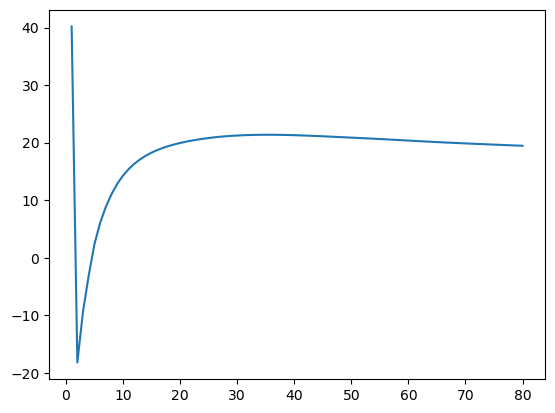

In [23]:
pr=rfswv/rfch4*100
plt.plot(pr)

In [37]:
# classic double time lag, cp=0.1 at 60 km, 87 deg, 85 used as width of the plot alpha
classic_swv = [-0.00074676,-0.00074676, 0.00070385, 0.00054356,  0.00020663, -0.00034065
 -0.00088643,-0.00143038,-0.0019712 ,-0.00250658, -0.00303375, -0.00355105
 -0.0040591 ,-0.00455884,-0.00505133,-0.00553752, -0.0060182 , -0.00649403
 -0.00696637,-0.00743686,-0.00790689,-0.00837758, -0.00884981, -0.00932422
 -0.0098012 ,-0.01028091,-0.01076327,-0.01124834, -0.01174411, -0.01226866
 -0.01283762,-0.0134481 ,-0.0140339 ,-0.01452133, -0.01485552, -0.0149993
 -0.01493222,-0.01465006,-0.01416472,-0.01350485, -0.01271679]

swv_less_lag = [-0.00074676,  0.00070385,  0.00054356 , 0.00020663 ,-0.00034065 ,-0.00088643
 -0.00143038, -0.0019712 , -0.00250658 ,-0.00303375 ,-0.00355105 ,-0.0040591
 -0.00455884, -0.00505133, -0.00553752 ,-0.0060182  ,-0.00649403 ,-0.00696637
 -0.00743686, -0.00790689, -0.00837758 ,-0.00884981 ,-0.00932422 ,-0.0098012
 -0.01028091, -0.01076327, -0.01124834 ,-0.01174411 ,-0.01226866 ,-0.01283762
 -0.0134481 , -0.0140339 , -0.01452133 ,-0.01485552 ,-0.0149993  ,-0.01493222
 -0.01465006, -0.01416472, -0.01350485 ,-0.01271679 ,-0.01186592]

swv_less_lag_cp0_no5 = [-0.00074655,  0.00070405,  0.00054376, 0.00020684, -0.00034027, -0.00088587
 -0.00142965, -0.00197029, -0.0025055 ,-0.0030325 , -0.00354964, -0.00405753
 -0.00455711, -0.00504944, -0.00553548,-0.00601601, -0.0064917 , -0.0069639            # cp=0, no-5 correction, less lag
 -0.00743425, -0.00790413, -0.00837468,-0.00884677, -0.00932104, -0.00979788
 -0.01027745, -0.01075968, -0.01124461,-0.01174024, -0.01226465, -0.01283347
 -0.01344379, -0.0140294 , -0.01451665,-0.0148507 , -0.01499437, -0.01492724
 -0.01464508, -0.01415982, -0.01350008,-0.01271221, -0.01186157]



swv_less_lag_cp0 = [-0.00074676,  0.00070385,  0.00054356, 0.00020663, -0.00034047, -0.00088628
 -0.00143026, -0.00197111, -0.00250651,-0.00303371, -0.00355104, -0.00405912
 -0.00455888, -0.0050514 , -0.00553762,-0.00601832, -0.00649418, -0.00696655  #cp=0 less lag
 -0.00743706, -0.00790711, -0.00837782,-0.00885007, -0.0093245 , -0.0098015
 -0.01028123, -0.01076362, -0.01124871,-0.0117445 , -0.01226907, -0.01283805
 -0.01344852, -0.01403432, -0.01452179,-0.01485605, -0.0149999 , -0.01493291
 -0.01465082, -0.01416556, -0.01350574,-0.01271773, -0.01186687,]

swv_less_lag_cp0_alt80 = [-0.00074676,  0.00070385,  0.00054356, 0.00020663, -0.0003432 , -0.00089194
 -0.00143882, -0.00198255, -0.00252083,-0.00305085, -0.00357094, -0.00408171
 -0.00458411, -0.00507921, -0.00556795,-0.00605114, -0.00652945, -0.00700422            #cp=0 less lag alt = 80
 -0.00747711, -0.00794951, -0.00842256,-0.00889715, -0.0093739 , -0.00985323
 -0.01033528, -0.01082   , -0.01130741,-0.01180552, -0.01233239, -0.01290365
 -0.01351685, -0.01410572, -0.01459615,-0.01493293, -0.01507861, -0.01501255
 -0.01473041, -0.01424404, -0.01358209,-0.01279101, -0.01193632]



In [38]:
(np.array(swv_less_lag)-np.array(classic_swv))*1000

array([ 0.     ,  1.45061, -0.16029, -0.33693, -0.54728, -1.08973,
       -0.54082, -0.53538, -0.52717, -0.5173 , -1.00779, -0.49249,
       -0.48619, -0.48068, -0.47583, -0.94283, -0.47003, -0.47069,
       -0.47223, -0.47441, -0.95669, -0.48236, -0.48507, -0.49577,
       -0.52455, -1.17944, -0.5858 , -0.48743, -0.33419, -0.14378,
        0.34924,  0.48534,  0.65987,  0.78806,  0.85087])

In [39]:
(np.array(swv_less_lag_cp0)-np.array(swv_less_lag_cp0_alt80))*1000

array([0.     , 0.     , 0.     , 0.     , 0.00273, 0.01422, 0.01144,
       0.01432, 0.01714, 0.0199 , 0.04782, 0.02781, 0.03033, 0.03282,
       0.03527, 0.07772, 0.0424 , 0.04474, 0.04708, 0.0494 , 0.10578,
       0.05638, 0.0587 , 0.06102, 0.06332, 0.13393, 0.0714 , 0.07436,
       0.07688, 0.07871, 0.15923, 0.07848, 0.07635, 0.07328, 0.06945])

In [40]:
(np.array(swv_less_lag)-np.array(swv_less_lag_cp0))*1000

array([ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, -1.80e-04, -2.70e-04,
       -9.00e-05, -7.00e-05, -4.00e-05, -1.00e-05,  6.00e-05,  7.00e-05,
        1.00e-04,  1.20e-04,  1.50e-04,  3.80e-04,  2.20e-04,  2.40e-04,
        2.60e-04,  2.80e-04,  6.20e-04,  3.50e-04,  3.70e-04,  3.90e-04,
        4.10e-04,  8.50e-04,  4.20e-04,  4.60e-04,  5.30e-04,  6.00e-04,
        1.45e-03,  8.40e-04,  8.90e-04,  9.40e-04,  9.50e-04])

In [2]:
import numpy as np
a = -0.00088
b = 0.47373
c = -0.74676
x1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
x2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
print(x1, x2)

1.5809840400029074 536.7485614145426
